# Data Acquisition

In [95]:
# Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [61]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

In [4]:
raw_data = pd.read_csv("imports-85.data", header=None)
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
# create headers for the dataframe

columns = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

raw_data.columns = columns
print(raw_data.shape)
raw_data.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
raw_data.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [12]:
raw_data.replace("?", np.nan, inplace=True)
raw_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [13]:
raw_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

# Handling Missing Data

We will handle the missing data in the following manner:

Replace by mean:
- "normalized-losses"
- "bore"
- "stroke"
- "horsepower"
- "peak-rpm"

Replace by mode:
- "num-of-doors"

Drop rows:
- "price"

## Replacing 'NaN' values by mean:

In [20]:
raw_data["normalized-losses"] = raw_data["normalized-losses"].fillna(raw_data["normalized-losses"].astype("float").mean(axis=0))
raw_data["bore"] = raw_data["bore"].fillna(raw_data["bore"].astype("float").mean())
raw_data["stroke"] = raw_data["stroke"].fillna(raw_data["stroke"].astype("float").mean())
raw_data["horsepower"] = raw_data["horsepower"].fillna(raw_data["horsepower"].astype("float").mean())
raw_data["peak-rpm"] = raw_data["peak-rpm"].fillna(raw_data["peak-rpm"].astype("float").mean())

## Replacing 'NaN' value by mode:

In [23]:
raw_data["num-of-doors"].mode()

0    four
dtype: object

In [24]:
raw_data["num-of-doors"] = raw_data["num-of-doors"].fillna("four")

## Drop rows of 'price':

In [34]:
raw_data.dropna(subset=['price'],axis=0,inplace=True)

In [35]:
# Reset index
raw_data.reset_index(drop=True, inplace=True)
raw_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [36]:
raw_data.shape

(201, 26)

## Convert the data types

In [39]:
raw_data[["bore", "stroke", "price", "peak-rpm"]] = raw_data[["bore", "stroke", "price", "peak-rpm"]].astype("float")
raw_data[["normalized-losses"]] = raw_data[["normalized-losses"]].astype("float")

In [48]:
raw_data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-L/100           float64
highway-L/100        float64
price                float64
heigth               float64
dtype: object

# Data Standardization and Normalization

In [45]:
# Convert city-mpg and highway-mpg to L/100km

raw_data["city-mpg"] = 235/raw_data["city-mpg"]
raw_data["highway-mpg"] = 235/raw_data["highway-mpg"]
raw_data.rename(columns = {"city-mpg": "city-L/100", "highway-mpg": "highway-L/100"}, inplace=True)
raw_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100,highway-L/100,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450.0


### Normalization

In [46]:
# normalize the values of length, width and height

raw_data["length"] = raw_data["length"]/ raw_data["length"].max()
raw_data["width"] = raw_data["width"]/ raw_data["width"].max()
raw_data["heigth"] = raw_data["height"]/ raw_data["height"].max()

### Binning of "horsepower"

We will now convert the horsepower feature into 3 different bins as follows:
- High horsepower
- Medium horsepower
- Low horsepower

In [47]:
raw_data["horsepower"] = raw_data["horsepower"].astype("int", copy=True)

In [49]:
bins = np.linspace(min(raw_data["horsepower"]), max(raw_data["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [50]:
bin_names = ["Low", "Medium", "High"]
raw_data["horsepower-binned"] = pd.cut(raw_data["horsepower"], bins, labels= bin_names, include_lowest=True)
raw_data[["horsepower", "horsepower-binned"]].head()

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [51]:
raw_data["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

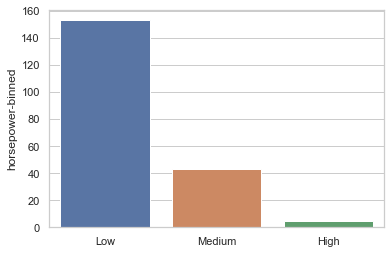

In [52]:
sns.set(style='whitegrid')
sns.barplot(bin_names, raw_data["horsepower-binned"].value_counts() )

# Categorizing features

In [53]:
raw_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100,highway-L/100,price,heigth,horsepower-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495.0,0.816054,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500.0,0.816054,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500.0,0.876254,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0,0.908027,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450.0,0.908027,Low


In [54]:
# convert fuel-type into two categories

fuel_dummy = pd.get_dummies(raw_data["fuel-type"])
fuel_dummy.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [57]:
new_df = pd.concat([raw_data, fuel_dummy], axis=1)
new_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-L/100,highway-L/100,price,heigth,horsepower-binned,diesel,gas
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21.0,27.0,13495.0,0.816054,Low,0,1
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21.0,27.0,16500.0,0.816054,Low,0,1
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19.0,26.0,16500.0,0.876254,Medium,0,1
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24.0,30.0,13950.0,0.908027,Low,0,1
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18.0,22.0,17450.0,0.908027,Low,0,1


In [63]:
new_df.drop("fuel-type", axis=1, inplace=True)

In [64]:
new_df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100,highway-L/100,price,heigth,horsepower-binned,diesel,gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495.0,0.816054,Low,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500.0,0.816054,Low,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500.0,0.876254,Medium,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0,0.908027,Low,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450.0,0.908027,Low,0,1


# Data Analysis and Visualization

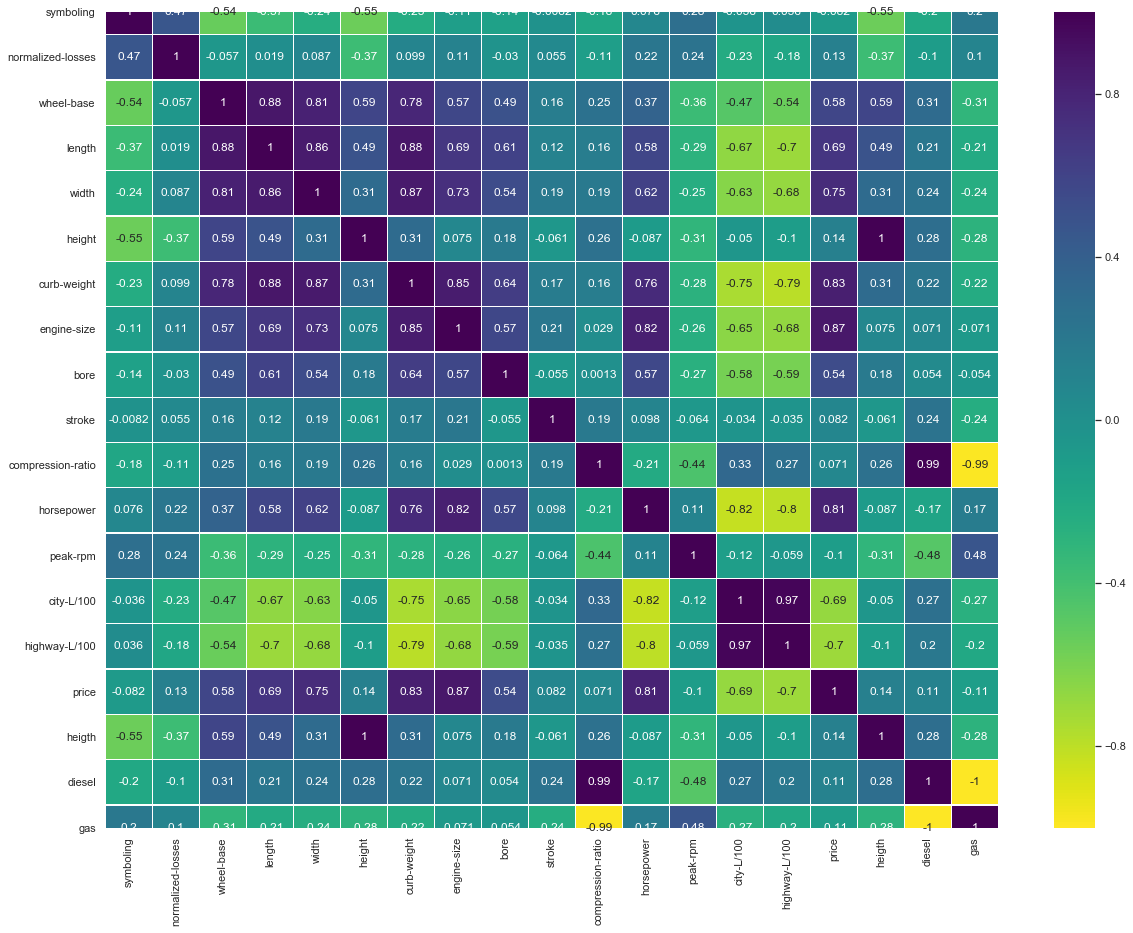

In [83]:
plt.subplots(figsize=(20, 15))
sns.heatmap(new_df.corr(), annot=True, cmap="viridis_r", linewidths=0.4)

In [77]:
new_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100,highway-L/100,price,heigth,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,-0.550160,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,-0.373737,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.590742,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.492063,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.306002,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,1.000000,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.307581,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.074694,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.180449,0.054458,-0.054458
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,-0.060663,0.241064,-0.241064


## Positive linear relationship

(0, 56221.75194746104)

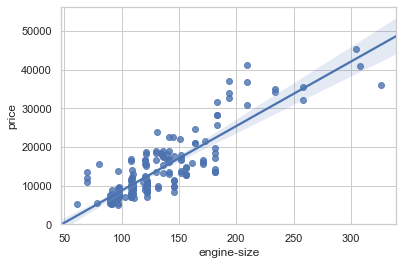

In [84]:
sns.regplot(x="engine-size", y="price", data=new_df)
plt.ylim(0,)

We can see here that engine size and price have a positive linear relationship.


now, lets see the relationship between highway-L/100 and price

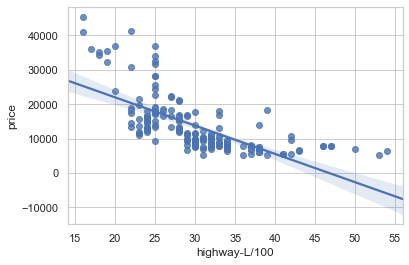

In [86]:
sns.regplot(x="highway-L/100", y="price", data=new_df)

**"highway-L/100" and "price" have a negative relationship**

(0, 47436.148325769056)

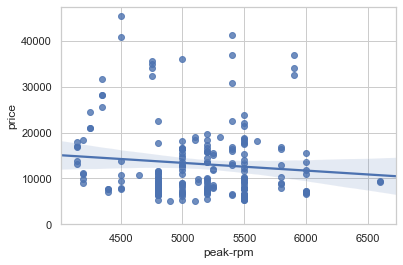

In [88]:
sns.regplot(x="peak-rpm", y="price", data=new_df)
plt.ylim(0,)

**"peak-rpm" and "price" have a weak linear relationship**

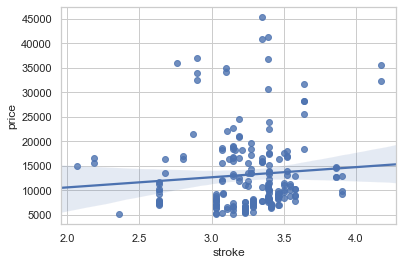

In [89]:
sns.regplot(x="stroke", y="price", data=new_df)

**"stroke" also has a weak linear relationship with "price"**

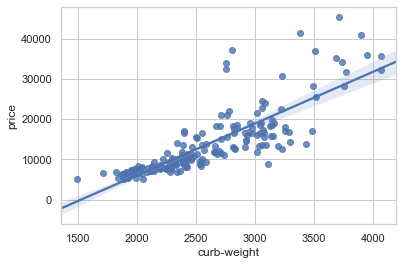

In [108]:
sns.regplot(x="curb-weight", y="price", data=new_df)

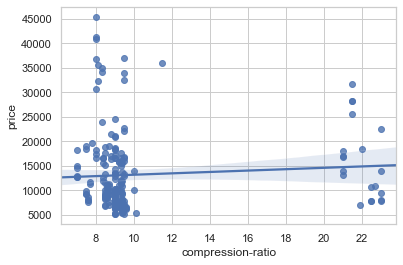

In [112]:
sns.regplot(x="compression-ratio", y="price", data=new_df)

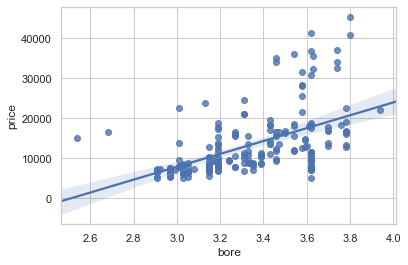

In [124]:
sns.regplot(x="bore", y="price", data=new_df)

## Categorical variables

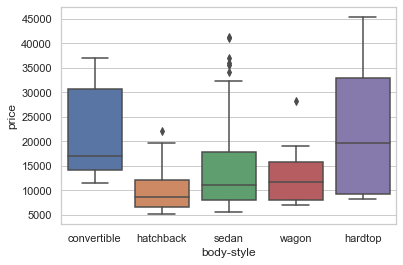

In [92]:
sns.boxplot(x="body-style", y="price", data=new_df)

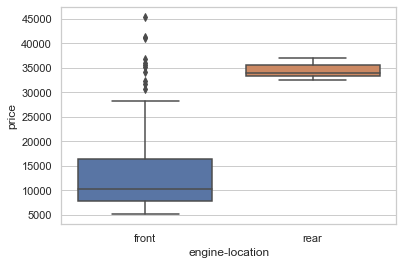

In [93]:
sns.boxplot(x="engine-location", y="price", data=new_df)

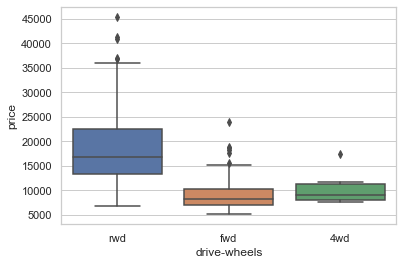

In [94]:
sns.boxplot(x="drive-wheels", y="price", data=new_df)

In [113]:
drive_dummy = pd.get_dummies(new_df["drive-wheels"])

In [115]:
new_df= pd.concat([new_df, drive_dummy], axis=1)

In [116]:
new_df.drop("drive-wheels", axis=1, inplace=True)

In [117]:
new_df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100,highway-L/100,price,heigth,horsepower-binned,diesel,gas,4wd,fwd,rwd
0,3,122.0,alfa-romero,std,two,convertible,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495.0,0.816054,Low,0,1,0,0,1
1,3,122.0,alfa-romero,std,two,convertible,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500.0,0.816054,Low,0,1,0,0,1
2,1,122.0,alfa-romero,std,two,hatchback,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500.0,0.876254,Medium,0,1,0,0,1
3,2,164.0,audi,std,four,sedan,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0,0.908027,Low,0,1,0,1,0
4,2,164.0,audi,std,four,sedan,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450.0,0.908027,Low,0,1,1,0,0


# Correlation and Causation of variables

**Correlation:** is a measure of the extent of interdependence between two variables

whereas,

**Causation:** is the relationship between cause and effect between two variables

In [98]:
pearson_coef, p_value = stats.pearsonr(new_df['wheel-base'], new_df['price'])
print("The Peearson Correlation Coefficient is: ", pearson_coef, " P-value is: ", p_value)

The Peearson Correlation Coefficient is:  0.584641822265508  P-value is:  8.076488270733218e-20


In [99]:
pearson_coef, p_value = stats.pearsonr(new_df['horsepower'], new_df['price'])
print("The Peearson Correlation Coefficient is: ", pearson_coef, " P-value is: ", p_value)

The Peearson Correlation Coefficient is:  0.8096068016571054  P-value is:  6.273536270650504e-48


In [100]:
pearson_coef, p_value = stats.pearsonr(new_df['length'], new_df['price'])
print("The Peearson Correlation Coefficient is: ", pearson_coef, " P-value is: ", p_value)

The Peearson Correlation Coefficient is:  0.6906283804483642  P-value is:  8.016477466158759e-30


In [101]:
pearson_coef, p_value = stats.pearsonr(new_df['width'], new_df['price'])
print("The Peearson Correlation Coefficient is: ", pearson_coef, " P-value is: ", p_value)

The Peearson Correlation Coefficient is:  0.7512653440522674  P-value is:  9.200335510481516e-38


In [102]:
pearson_coef, p_value = stats.pearsonr(new_df['curb-weight'], new_df['price'])
print("The Peearson Correlation Coefficient is: ", pearson_coef, " P-value is: ", p_value)

The Peearson Correlation Coefficient is:  0.8344145257702846  P-value is:  2.1895772388936914e-53


In [103]:
pearson_coef, p_value = stats.pearsonr(new_df['engine-size'], new_df['price'])
print("The Peearson Correlation Coefficient is: ", pearson_coef, " P-value is: ", p_value)

The Peearson Correlation Coefficient is:  0.8723351674455185  P-value is:  9.265491622198389e-64


In [104]:
pearson_coef, p_value = stats.pearsonr(new_df['bore'], new_df['price'])
print("The Peearson Correlation Coefficient is: ", pearson_coef, " P-value is: ", p_value)

The Peearson Correlation Coefficient is:  0.5431553832626602  P-value is:  8.049189483935489e-17


In [105]:
pearson_coef, p_value = stats.pearsonr(new_df['city-L/100'], new_df['price'])
print("The Peearson Correlation Coefficient is: ", pearson_coef, " P-value is: ", p_value)

The Peearson Correlation Coefficient is:  -0.6865710067844677  P-value is:  2.321132065567674e-29


In [106]:
pearson_coef, p_value = stats.pearsonr(new_df['highway-L/100'], new_df['price'])
print("The Peearson Correlation Coefficient is: ", pearson_coef, " P-value is: ", p_value)

The Peearson Correlation Coefficient is:  -0.7046922650589529  P-value is:  1.7495471144477352e-31


### So, from the above analysis we can conclude that the following variables should be taken into account for model development.

- **wheelbase**
- **horsepower**
- **length**
- **width**
- **curb-weight**
- **engine-size**
- **bore**
- **city-L/100**
- **highway-L/100**
- **drive-wheel**

# Model Development

## Model-1

In [140]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [107]:
from sklearn.linear_model import LinearRegression

In [148]:
X = new_df[["wheel-base", "horsepower", "curb-weight", "engine-size", "highway-L/100", "city-L/100", "bore"]]
y = new_df[["price"]]

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)

In [156]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (140, 7)
y_train: (140, 1)
X_test: (61, 7)
y_test: (61, 1)


In [149]:
lm = LinearRegression()

In [157]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
yhat = lm.predict(X_test)

# Model Prediction visualization

Text(0, 0.5, 'Proportion of Cars')

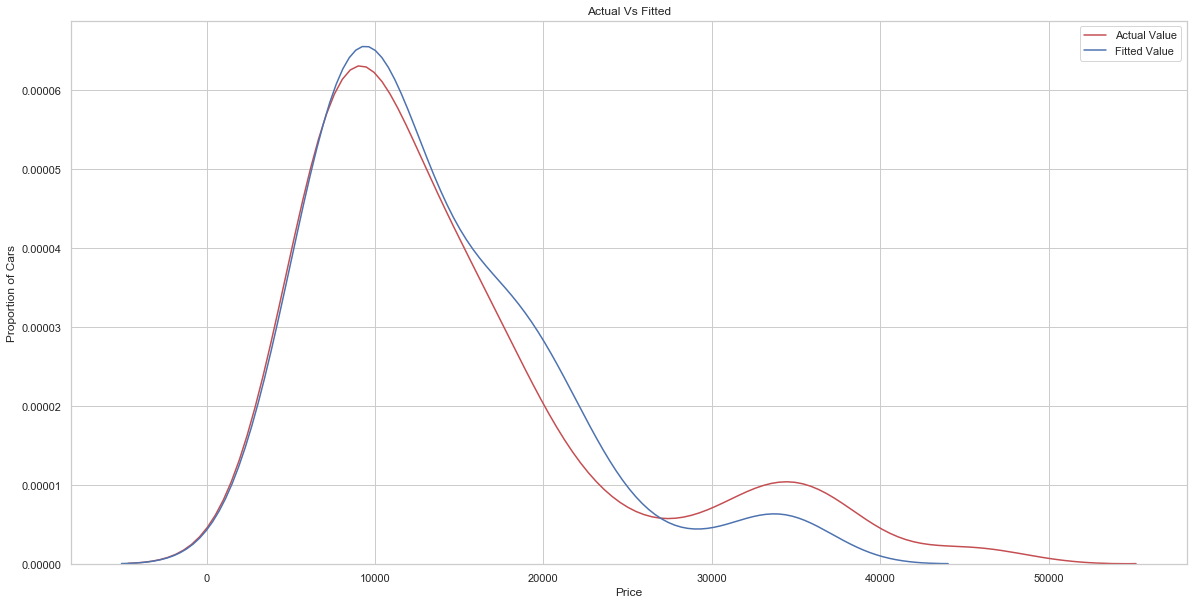

In [159]:
plt.figure(figsize=(20,10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Value")

plt.title("Actual Vs Fitted")
plt.xlabel("Price")
plt.ylabel("Proportion of Cars")

## Model-2

In [160]:
import xgboost
regressor = xgboost.XGBRegressor()

## Hyperparameters

In [161]:
n_estimators = [100, 400, 500, 700, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1,2,3,4]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 1]

# Define the grid of hyperparameters to search

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score}

In [162]:
random_cv = RandomizedSearchCV(estimator=regressor,
                              param_distributions=hyperparameter_grid,
                              cv=5, n_iter=50,
                              scoring = 'neg_mean_absolute_error',
                              n_jobs = 4, verbose = 5,
                              return_train_score = True,
                              random_state=42)

In [163]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    7.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   13.6s
[Parallel(n_jobs=4)]: Done 243 out of 250 | elapsed:   18.0s remaining:    0.5s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   18.4s finished


[17:23:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [164]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [167]:
regressor = xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [168]:
regressor.fit(X_train, y_train)

[17:25:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [169]:
yhat1 = regressor.predict(X_test)

# Model prediction visualization-2

Text(0, 0.5, 'Proportion of Cars')

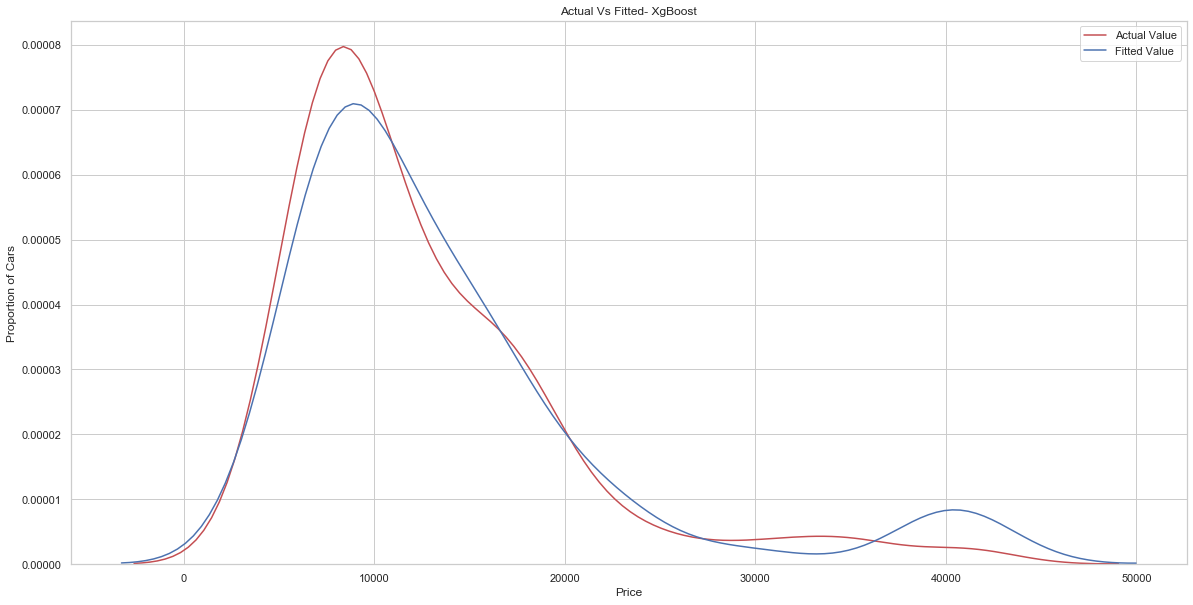

In [170]:
plt.figure(figsize=(20,10))
ax2= sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(yhat1, hist=False, color="b", label="Fitted Value", ax=ax2)

plt.title("Actual Vs Fitted- XgBoost")
plt.xlabel("Price")
plt.ylabel("Proportion of Cars")

# Model Evaluation

In [193]:
from sklearn.metrics import r2_score

In [185]:
r2 = r2_score(y_test, yhat)
print("The r2 value for model 2 is:", r2)

The r2 value for model 2 is: 0.7151246275059746


In [184]:
r2_1 = r2_score(y_test, yhat1)
print("The r2 value for model 2 is:", r2_1)

The r2 value for model 2 is: 0.8349943831299477


# Result

As the evaluation score, it seems the XgBoost model is better.